# Intentando Simbólicamente

In [2]:
var('a b c')

(a, b, c)

In [3]:
integrate(cos(x)/(1^2+1^2+1^2-2*cos(x))^(1/2),(x,0,2*3.1416))

6.2832

RIP la simbólica

# Intentando numéricamente

In [4]:
numerical_integral(cos(x)/(1^2+1^2+1^2-2*cos(x))^(1/2),0,2*3.1416)

(0.7863649895644217, 2.957902513773982e-14)

Bien

# Hallando el campo de un solenoide a la mala

In [5]:
from IPython.display import Latex

## El potencial vectorial magnético

Hay varias formas de escribirlo que son útiles (ver artículo de la NASA https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19980227402.pdf).

El de una espira en polares es

In [6]:
Latex(r"""
\begin{equation}
A_{\phi}=\frac{\mu_0 R i}{4\pi} \int_{0}^{2\pi} \frac{\cos{\theta d\theta}}{\sqrt{z^2+\rho^2+R^2-2\rho R\cos{\theta}}}
\end{equation}
""")

<IPython.core.display.Latex object>

Integrándolo para una densidad de espiras $\frac{N}{L}$ y arreglando las variables da

In [7]:
Latex(r"""
\begin{equation}
A_{\phi}=\frac{\mu_0 R i}{4\pi} \frac{N}{L} \int_{h_{-}}^{h_{+}} \left[ \int_{0}^{2\pi} \frac{\cos{\theta d\theta}}{\sqrt{z^2+\rho^2+R^2-2\rho R\cos{\theta}}}\right]dh
\end{equation}
""")

<IPython.core.display.Latex object>

donde $h=z-l$  y   $h_{\pm}=z\pm\frac{L}{2}$  ($z$ es la altura del punto de observación y $l$ es la de la espira).

## El campo magnético

$\vec{B}=\vec{\nabla}\times\vec{A}$

### El campo en $\rho$

Derivando y usando teorema fundamental de cálculo

In [8]:
Latex(r"""
\begin{align}
B_{\rho}=&-\frac{\mu_0 R i}{4\pi}\frac{N}{L} \int_{0}^{2\pi}\left[\frac{\cos{\theta}}{\sqrt{h^2+\rho^2+R^2-2\rho R\cos{\theta}}}\right]_{h_{-}}^{h_{+}}d\theta \\
=&-\frac{\mu_0 R i}{4\pi}\frac{N}{L} \int_{0}^{2\pi} \left[  \frac{\cos{\theta}}{\sqrt{h_{+}^{\,\,2}+\rho^2+R^2-2\rho R\cos{\theta}}} - \frac{\cos{\theta}}{\sqrt{h_{-}^{\,\,2}+\rho^2+R^2-2\rho R\cos{\theta}}} \right]d\theta
\end{align}

""")

<IPython.core.display.Latex object>

### El campo en $z$

Este no me sale

In [9]:
Latex(r"""
\begin{align}
B_{z}=&\frac{\mu_0 R i}{4\pi} \frac{N}{L} \int_{0}^{2\pi} \left[ \frac{h(R-\rho\cos{\theta})}{(\rho^2+R^2-2\rho R\cos{\theta})\sqrt{h^2+\rho^2+R^2-2\rho R\cos{\theta}} } \right]_{h_{-}}^{h_{+}}d\theta \\
=&\frac{\mu_0 R i}{4\pi} \frac{N}{L} \int_{0}^{2\pi} \left[ \frac{h_{+}(R-\rho\cos{\theta})}{(\rho^2+R^2-2\rho R\cos{\theta})\sqrt{h_{+}^{\,\,2}+\rho^2+R^2-2\rho R\cos{\theta}} } - \frac{h_{-}(R-\rho\cos{\theta})}{(\rho^2+R^2-2\rho R\cos{\theta})\sqrt{h_{-}^{\,\,2}+\rho^2+R^2-2\rho R\cos{\theta}} } \right] d\theta
\end{align}
""")

<IPython.core.display.Latex object>

# Ahora sí el cálculo numérico

Una forma

In [10]:
import numpy as np

In [11]:
z_vals=np.arange(-1,1,0.001)
Brhoe=np.array([numerical_integral(-((1)*(1.25663)/(100*4*pi))*((cos(x))/(((z+1/2)^2+(0.08)^2+(0.1)^2-2*(0.08)*(0.1)*cos(x))^(1/2)) - (cos(x))/(((z-1/2)^2+(0.08)^2+(0.1)^2-2*(0.08)*(0.1)*cos(x))^(1/2)) ) , 0, 2*pi)[0] for z in z_vals])
Bze=np.array([numerical_integral(((1.25663)/(100*4*pi))*((z+1/2)*(0.1-0.08*cos(x))/(((0.08)^2+(0.1)^2-2*(0.08)*(0.1)*cos(x))*((z+1/2)^2+(0.08)^2+(0.1)^2-2*(0.08)*(0.1)*cos(x))^(1/2)) - (z-1/2)*((0.1)-(0.08)*cos(x))/(((0.08)^2+(0.1)^2-2*(0.08)*(0.1)*cos(x))*((z-1/2)^2+(0.08)^2+(0.1)^2-2*(0.08)*(0.1)*cos(x))^(1/2))), 0, 2*pi) for z in z_vals])

# Graficando 

In [12]:
import pylab as plt

Para $B_{\rho}$

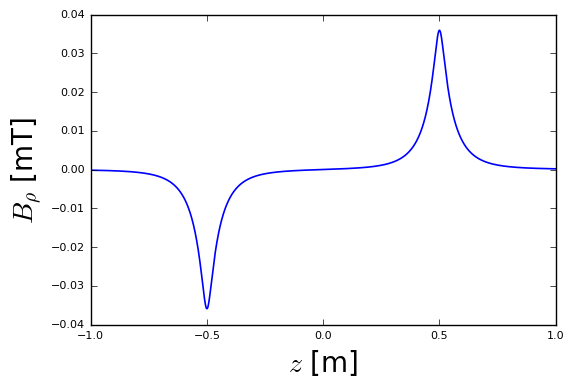

In [13]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)


plt.plot(z_vals,Brhoe,linewidth=1.2)
plt.xlabel(r'$z$ [m]')
plt.ylabel(r'$B_{\rho}$ [mT]')
plt.savefig('Brho_exacto.png', format='png', dpi=1000)
plt.show()

YessssssssSSSS!

# Para $B_{z}$

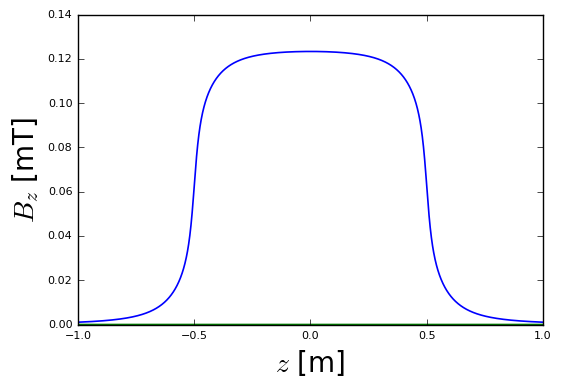

In [14]:
plt.plot(z_vals,Bze,linewidth=1.2)
plt.xlabel(r'$z$ [m]')
plt.ylabel(r'$B_{z}$ [mT]')
plt.savefig('Bz_exacto.png', format='png', dpi=1000)
plt.show()